In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

visa_df = pd.read_csv(r"C:\Users\vinay\Documents\Naresh IT\Data_Files\Visadataset.csv")

cat = visa_df.select_dtypes(include='object').columns
num = visa_df.select_dtypes(exclude='object').columns

cat,num

(Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
        'requires_job_training', 'region_of_employment', 'unit_of_wage',
        'full_time_position', 'case_status'],
       dtype='object'),
 Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object'))

- Variate : Variables
- Bi-Varite : Two Variable Analysis
- Multi-Varite : More than Two Variable Analysis

In [2]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

In [3]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

- total how many observation: 25480

    - certifide : 17018

    - denied   : 8462

- how many from asia :  16861

    - out of Asia applicants how many got visa: 

    - out of Asia applicants how many rejected visa: 

### Getting data of ASIA APPLICATIONS who got their visa CERTIFIED and DENIED ###

In [4]:
con1 = visa_df['case_status'] == 'Certified'
con2 = visa_df['case_status'] == 'Denied'
con3 = visa_df['continent'] == 'Asia'

certified_con = con1 & con3
certified_data = visa_df[certified_con]
print(len(certified_data))

denied_con = con2 & con3
denied_data = visa_df[denied_con]
print(len(denied_data))

11012
5849


In [5]:
lables = visa_df['continent'].value_counts().keys()
certi_count, denied_count = [],[]
for i in lables:
    con1 = visa_df['case_status'] == 'Certified'
    con2 = visa_df['case_status'] == 'Denied'
    con3 = visa_df['continent'] == i

    certified_con = con1 & con3
    certified = visa_df[certified_con]
    certi_count.append(len(certified))
    
    denied_con = con2 & con3
    denied = visa_df[denied_con]
    denied_count.append(len(denied))

In [6]:
certi_count,denied_count

([11012, 2957, 2037, 493, 397, 122], [5849, 775, 1255, 359, 154, 70])

In [7]:
cols = visa_df['case_status'].value_counts().keys()
idx = visa_df['continent'].value_counts().keys()
pd.DataFrame(zip(certi_count,denied_count),columns=cols,index=idx)

case_status,Certified,Denied
continent,,
Asia,11012,5849
Europe,2957,775
North America,2037,1255
South America,493,359
Africa,397,154
Oceania,122,70


## pd.crosstab() ##

In [8]:
col1 = visa_df['continent']
col2 = visa_df['case_status']
print(pd.crosstab(col1,col2))
print()
print(pd.crosstab(col2,col1))

case_status    Certified  Denied
continent                       
Africa               397     154
Asia               11012    5849
Europe              2957     775
North America       2037    1255
Oceania              122      70
South America        493     359

continent    Africa   Asia  Europe  North America  Oceania  South America
case_status                                                              
Certified       397  11012    2957           2037      122            493
Denied          154   5849     775           1255       70            359


<Axes: xlabel='continent'>

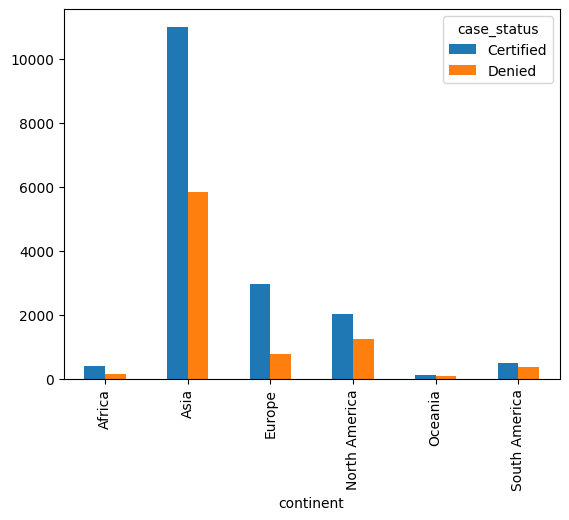

In [9]:
col1=visa_df['case_status']
col2=visa_df['continent']
r1=pd.crosstab(col2,col1)
r1.plot(kind='bar')

**task**

- I want to know how many certifide from asia 

    - In that how many Phd graduates are there

In [10]:
col1=visa_df['case_status']
col2=visa_df['continent']
col3=visa_df['education_of_employee']
Id=col2
cols= [col1,col3]
pd.crosstab(col2,cols)

case_status            Certified                                    Denied  \
education_of_employee Bachelor's Doctorate High School Master's Bachelor's   
continent                                                                    
Africa                        81        43          23      250         62   
Asia                        4407       780         676     5149       2761   
Europe                      1040       788         162      967        259   
North America                641       207         210      979        584   
Oceania                       38        19          19       46         28   
South America                160        75          74      184        173   

case_status                                           
education_of_employee Doctorate High School Master's  
continent                                             
Africa                       11          43       38  
Asia                        143        1614     1331  
Europe                       58         328      130  
North America                51         191      429  
Oceania                       3          17       22  
South America                14          63      109

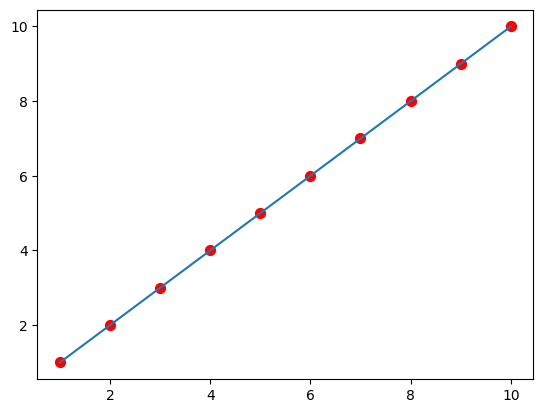

In [11]:
x=range(1,11)
y=range(1,11)
plt.scatter(x,y,c='Red',s=50)
plt.plot(x,y)

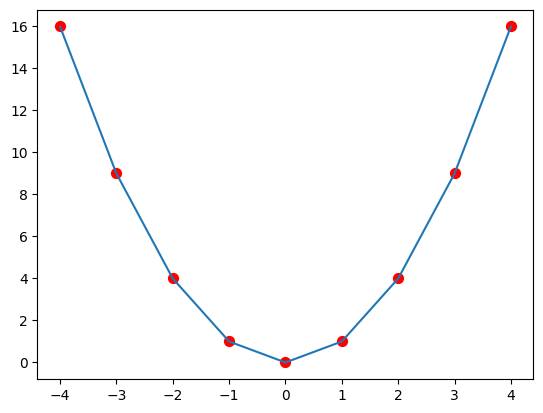

In [12]:
x=range(-4,5)
y=[i*i for i in x]
plt.scatter(x,y,c='Red',s=50)
plt.plot(x,y)

In [13]:
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

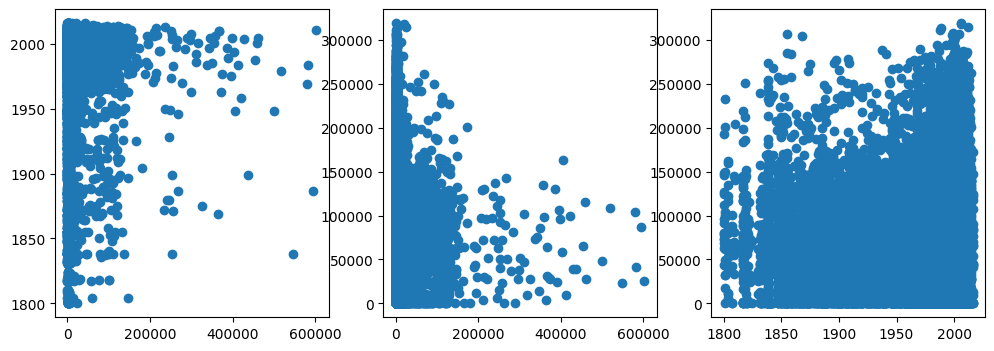

In [14]:
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
col3=visa_df['prevailing_wage']
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.scatter(col1,col2)
plt.subplot(1,3,2)
plt.scatter(col1,col3)
plt.subplot(1,3,3)
plt.scatter(col2,col3)

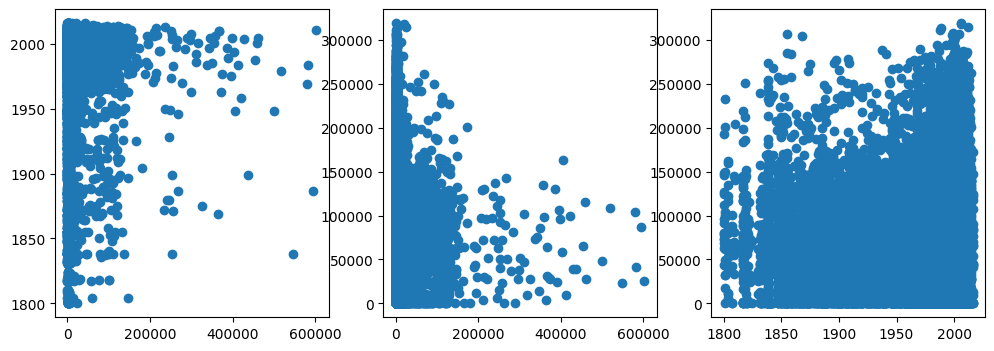

In [15]:
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
col3=visa_df['prevailing_wage']
plt.figure(figsize=(12,4))

plt.subplot(1,3,1).scatter(col1,col2)
plt.subplot(1,3,2).scatter(col1,col3)
plt.subplot(1,3,3).scatter(col2,col3)

In [16]:
# Visa df has both numerical and categorical
# but correlation apply only for numerical
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


In [22]:
# Read wine qulaity data
# apply wine_data.corr()
wine_df=pd.read_csv(r"C:\Users\vinay\Documents\Naresh IT\Data_Files\winequality_red.csv")
wine_df.corr(numeric_only=True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<Axes: >

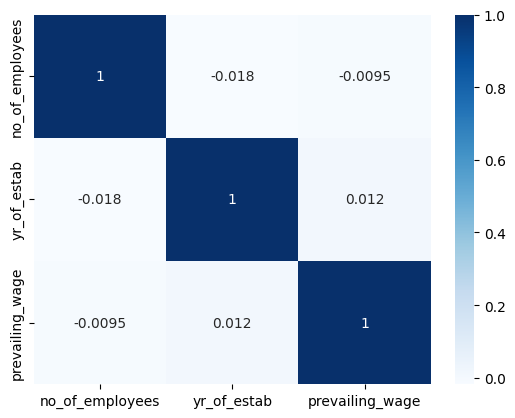

In [23]:
visa_corr=visa_df.corr(numeric_only=True)
sns.heatmap(visa_corr,
           annot=True,
           cmap='Blues')

<Axes: >

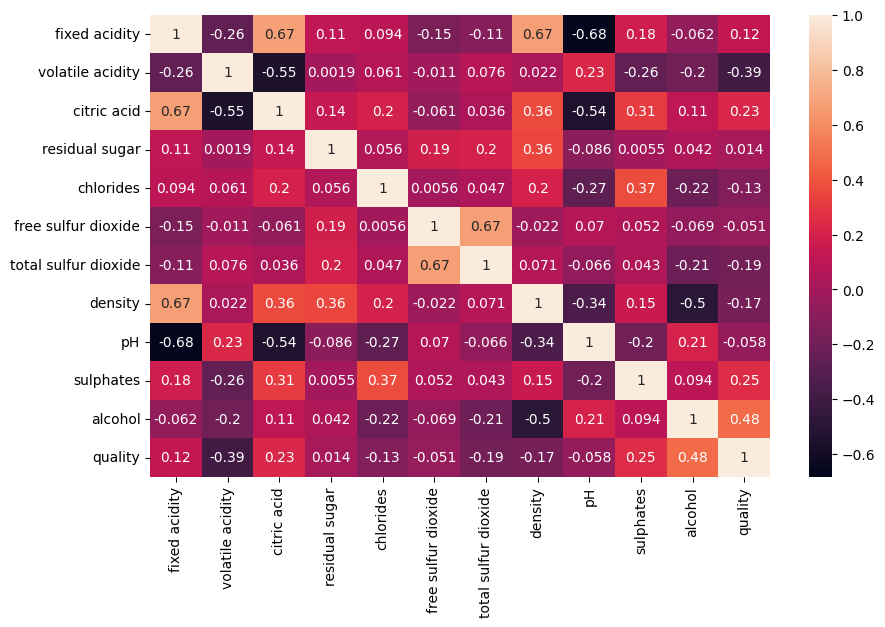

In [24]:
wine_corr=wine_df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(wine_corr,annot=True)

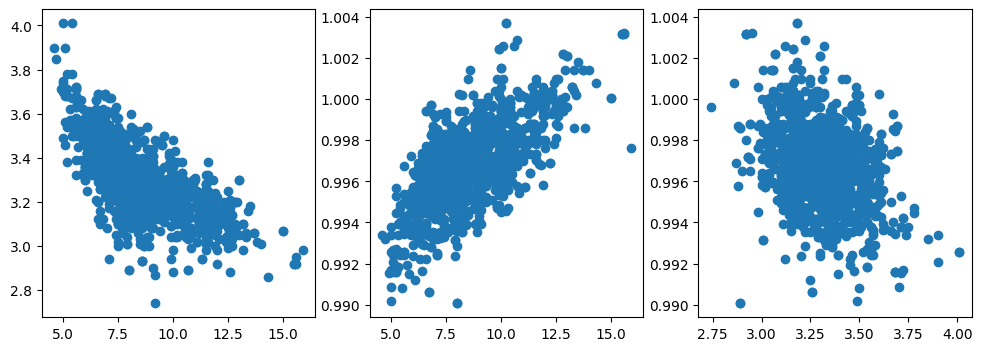

In [26]:
col1= wine_df['fixed acidity']
col2=wine_df['pH']
col3=wine_df['density']
plt.figure(figsize=(12,4))
plt.subplot(1,3,1).scatter(col1,col2)
plt.subplot(1,3,2).scatter(col1,col3)
plt.subplot(1,3,3).scatter(col2,col3)

- generally we need to have a good correlation between input and output columns

- we dont want a relation between input columns

In [27]:
#pd.DataFrame(wine_corr.iloc[:,-1]).sort_values(by='quality',ascending=False)
pd.DataFrame(wine_corr.iloc[:,-1]).sort_values(by='quality',ascending=False)

,quality
quality,1.000000
alcohol,0.476166
sulphates,0.251397
citric acid,0.226373
fixed acidity,0.124052
residual sugar,0.013732
free sulfur dioxide,-0.050656
pH,-0.057731
chlorides,-0.128907
density,-0.174919


In [28]:
wine_corr.sort_values(by='quality',ascending=False)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
quality,0.124052,-0.390558,0.226373,0.013732,-0.128907,-0.050656,-0.185100,-0.174919,-0.057731,0.251397,0.476166,1.000000
alcohol,-0.061668,-0.202288,0.109903,0.042075,-0.221141,-0.069408,-0.205654,-0.496180,0.205633,0.093595,1.000000,0.476166
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
